# Лаборатороная работа №5

---



# **1. Визуализация данных**

---



## **1(а).** Построение графика выбранного временного ряда

 Импорт библиотек и загрузка данных

In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Загружаем данные по акциям Apple за последние 5 лет
data = yf.download('AAPL', start='2019-01-01', end='2024-12-31')
ts = data['Close']  # Берем только цену закрытия

[*********************100%***********************]  1 of 1 completed


График исходного временного ряда

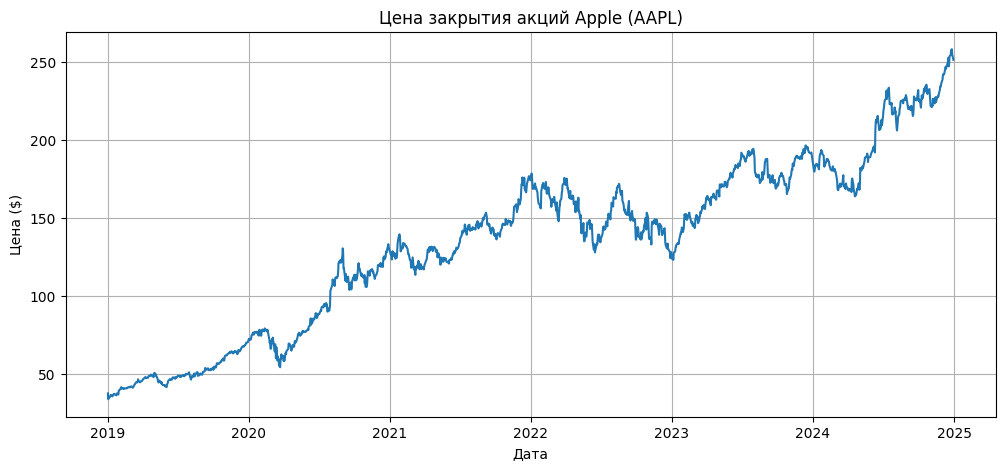

In [38]:
# Визуализация исходного временного ряда
plt.figure(figsize=(12, 5))
plt.plot(ts)
plt.title("Цена закрытия акций Apple (AAPL)")
plt.xlabel("Дата")
plt.ylabel("Цена ($)")
plt.grid()
plt.show()

## **1(b).** Построение графиков разностных рядов различного порядка

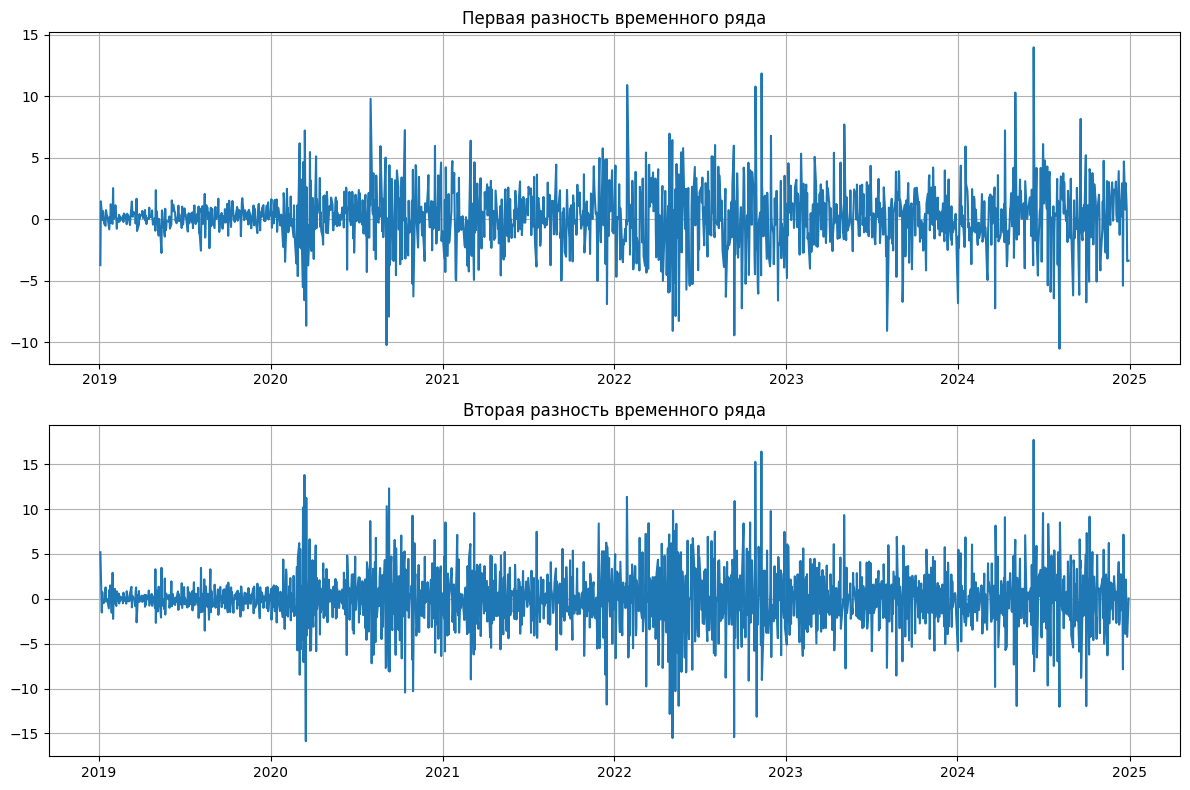

In [39]:
# Первая разность
ts_diff1 = ts.diff().dropna()
# Вторая разность
ts_diff2 = ts_diff1.diff().dropna()

# Визуализация разностных рядов
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].plot(ts_diff1)
axs[0].set_title("Первая разность временного ряда")
axs[0].grid()
axs[1].plot(ts_diff2)
axs[1].set_title("Вторая разность временного ряда")
axs[1].grid()
plt.tight_layout()
plt.show()



---


# **2. АКФ**
---





## **2(а).** Построение автокорреляционной функции ряда

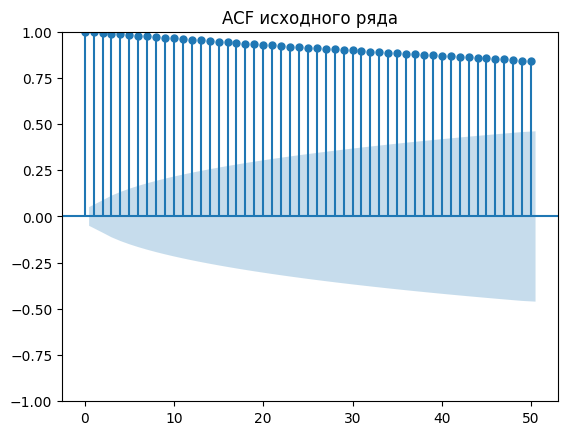

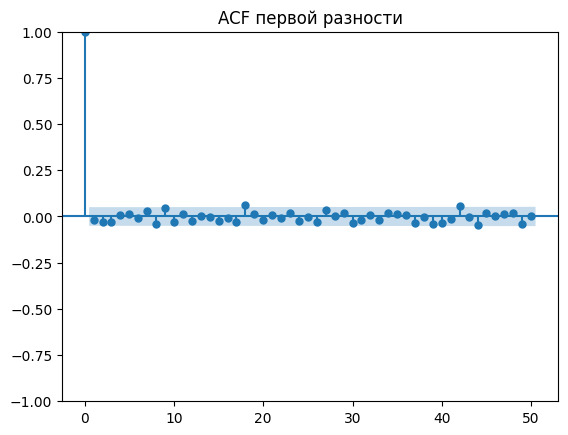

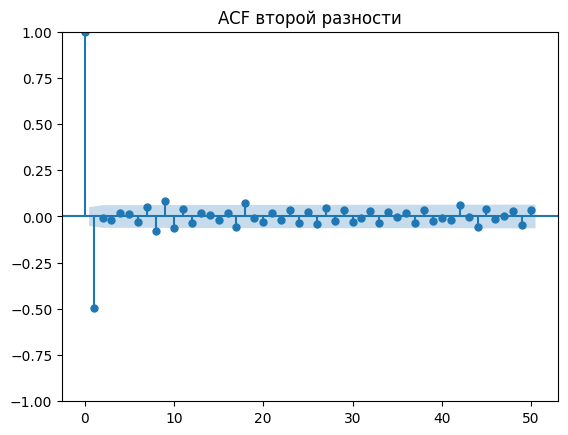

In [40]:
# ACF для исходного ряда
plot_acf(ts.dropna(), lags=50)
plt.title("ACF исходного ряда")
plt.show()

# ACF для первой разности
plot_acf(ts_diff1, lags=50)
plt.title("ACF первой разности")
plt.show()

# ACF для второй разности
plot_acf(ts_diff2, lags=50)
plt.title("ACF второй разности")
plt.show()

выводы по графикам:

* **ACF** **исходного ряда** показывает медленное убывание корреляций, причём значения автокорреляции остаются высокими даже на больших лагах. Это указывает на наличие ярко выраженного тренда и подтверждает, что исходный ряд нестационарен.

* **ACF** **первой разности** демонстрирует резкое падение автокорреляции: только лаг 1 значимо отличается от нуля, все последующие значения находятся в пределах доверительного интервала. Это свидетельствует о том, что первая разность устранила тренд, и ряд стал почти стационарным.

* **ACF** **второй разности** также показывает поведение, характерное для стационарных рядов: автокорреляции близки к нулю, все пики, кроме первых, находятся в пределах доверительного интервала. Однако дополнительных преимуществ по сравнению с первой разностью она не даёт.

## **2(b).** Выводы о наличии трендов, сезонности и т.д.


* Исходный ряд может иметь тренд (ACF убывает медленно)
* Разностные ряды убирают тренд и делают ряд более стационарным.
* Если в ACF видны циклы/волны — это может говорить о сезонности.



---
# **3. Тесты стационарности**

---



## **3(а).** Применим тест Дики-Фуллера для исходного ряда и для разностных рядов

In [41]:
def adf_test(series, title=''):
    print(f'\nADF тест: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF-статистика', 'p-значение', '# лагов', '# наблюдений']
    for value, label in zip(result[:4], labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("Ряд стационарен (отвергаем H0)")
    else:
        print("Ряд нестационарен (не отвергаем H0)")

# Применяем тест к исходному ряду и разностям
adf_test(ts, "Исходный ряд")
adf_test(ts_diff1, "Первая разность")
adf_test(ts_diff2, "Вторая разность")



ADF тест: Исходный ряд
ADF-статистика: -0.47422136787528085
p-значение: 0.8969496134042168
# лагов: 0
# наблюдений: 1508
Ряд нестационарен (не отвергаем H0)

ADF тест: Первая разность
ADF-статистика: -39.44908019073326
p-значение: 0.0
# лагов: 0
# наблюдений: 1507
Ряд стационарен (отвергаем H0)

ADF тест: Вторая разность
ADF-статистика: -14.552702535436827
p-значение: 4.9373107694954876e-27
# лагов: 21
# наблюдений: 1485
Ряд стационарен (отвергаем H0)


## **3(b).** Выводы

* Исходный временной ряд (цены закрытия акций Apple) оказался нестационарным, так как p-значение теста значительно превышает уровень значимости 0.05. Это указывает на наличие тренда или сезонных компонентов.

* Первая разность ряда показала значительное улучшение: p-значение снизилось и стало меньше 0.05, что позволяет отвергнуть нулевую гипотезу о нестационарности. Таким образом, первая разность ряда уже является стационарной.

* Вторая разность также показала стационарность, но необходимость её применения отпадает, так как уже первая разность обеспечила стационарное поведение ряда.



---


# **4. Экспоненциальное сглаживание**
---



## **4(а).** Построение сглаженных рядов при различных параметрах сглаживания

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



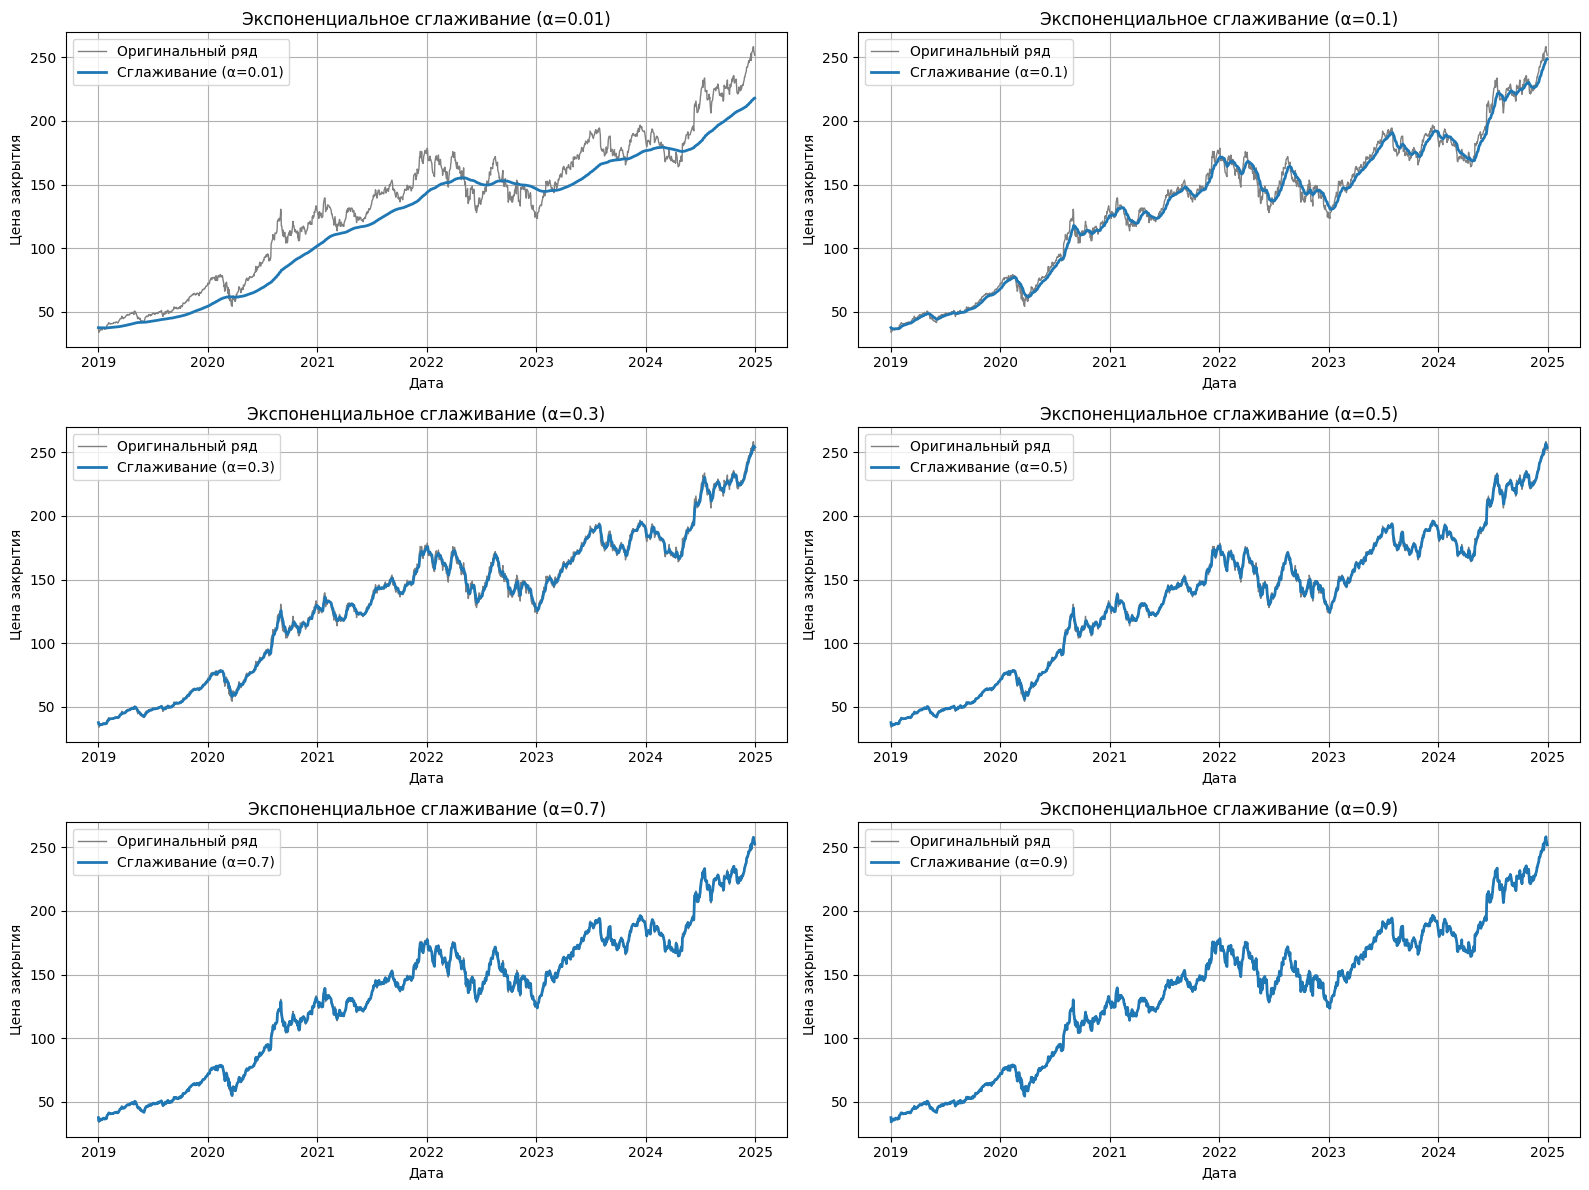

In [42]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Скачиваем данные по акциям Apple
data = yf.download('AAPL', start='2019-01-01', end='2024-12-31')
series = data['Close'].dropna()  # Убираем пропуски
series.index = pd.to_datetime(series.index)

def exponential_smoothing(series, alpha):
    result = [series.iloc[0]]  # начальное значение — первое наблюдение
    for t in range(1, len(series)):
        result.append(alpha * series.iloc[t] + (1 - alpha) * result[t - 1])
    return pd.Series(result, index=series.index)

# Значения альфа
alphas = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]

# Настраиваем размер рисунков
plt.figure(figsize=(16, 12))

for i, alpha in enumerate(alphas, 1):
    plt.subplot(3, 2, i)
    smoothed_series = exponential_smoothing(series, alpha)
    plt.plot(series, label='Оригинальный ряд', color='gray', linewidth=1)
    plt.plot(smoothed_series, label=f'Сглаживание (α={alpha})', linewidth=2)
    plt.title(f'Экспоненциальное сглаживание (α={alpha})')
    plt.xlabel('Дата')
    plt.ylabel('Цена закрытия')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


вывод по графику:
* График показывает, что при увеличении параметра сглаживания α сглаженный ряд становится ближе к исходному:

* при α = 0.1 — линия сглажена максимально, подавлены колебания, но запаздывает;
при α = 0.9 — ряд почти повторяет исходный, сглаживание минимально.

Таким образом, экспоненциальное сглаживание эффективно убирает шум и позволяет регулировать чувствительность к изменениям в зависимости от выбора параметра α.

## **4(b).** Выводы

* Экспоненциальное сглаживание позволяет уменьшить влияние шумов и выделить тренды в временном ряду.

* При малом значении α сглаживание сильное, но с задержкой реакции на изменения.

* При большом α сглаженный ряд близок к исходному и чувствителен к последним изменениям. Метод гибкий и хорошо подходит для анализа трендов и подготовки данных к прогнозированию.